<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_GMM(Gaussian_Mixture_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

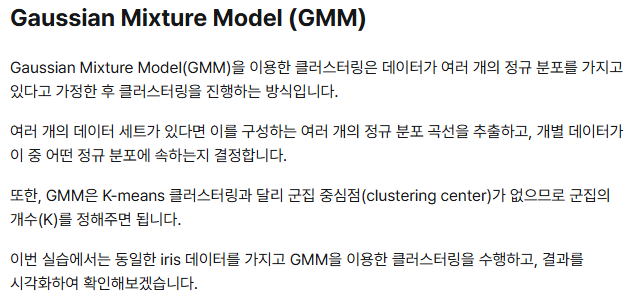

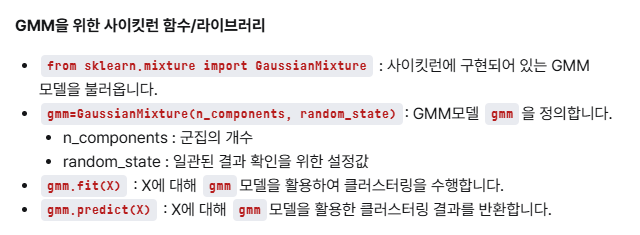

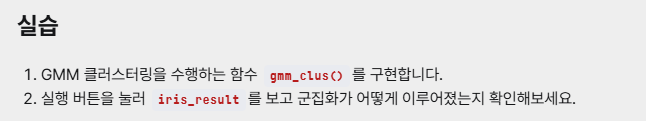

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from elice_utils import EliceUtils
elice_utils = EliceUtils()

# 데이터를 불러오고, 데이터 프레임 형태로 만든 후 반환하는 함수입니다.
def load_data():

    iris = load_iris()

    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)

    irisDF['target'] = iris.target

    return irisDF

"""
1. GMM 클러스터링을
   수행하는 함수를 구현합니다.

   Step01. GMM 객체를 불러옵니다.

           군집의 개수는 3,
           일관된 결과 확인을 위해
           random_state를 100으로 설정합니다.

   Step02. GMM 클러스터링을 수행합니다.

           클러스터링은 정답이 없는 데이터를
           사용하기 때문에 'target' 컬럼을 제거한
           데이터를 학습시켜줍니다.

   Step03. 군집화 결과를
           iris 데이터 프레임에 'cluster' 컬럼으로 추가합니다.

"""
def gmm_clus(irisDF):

    gmm = GaussianMixture(n_components=3, random_state=100)

    gmm.fit(irisDF.drop('target', axis=1))

    irisDF['cluster'] = gmm.predict(irisDF.drop('target', axis=1)) # axis=1 을 해줘야 target 변수를 제거한다

    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)

    return iris_result, irisDF

# 군집화 결과 시각화하기
def Visualize(irisDF):

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index

    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()

    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")


def main():

    irisDF = load_data()

    iris_result, irisDF = gmm_clus(irisDF)

    Visualize(irisDF)


if __name__ == "__main__":
    main()


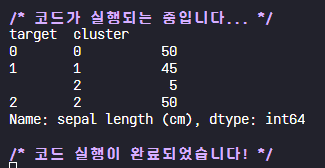

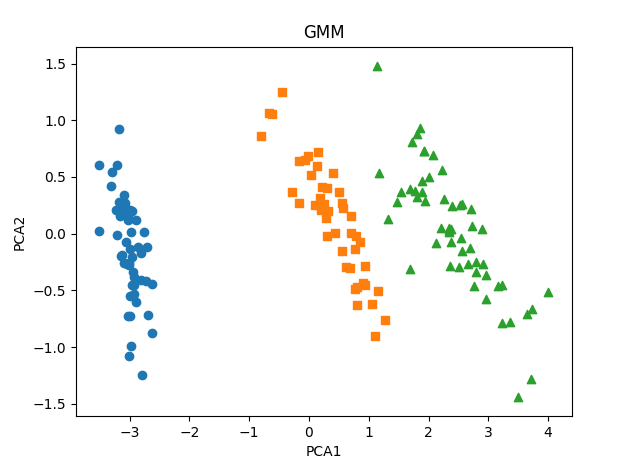